In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import DataLoader,Dataset

In [2]:
np.random.seed(1234)
y = np.ones(10000,dtype="long")
idx = np.random.uniform(size =10000)>0.5
y[idx] = 0 

print("positive_class",sum(y==1),"negative_class",sum(y==0))

positive_class 4958 negative_class 5042


In [3]:
idx1 = ~idx #positive class indices
idx2 = idx #negative class indices 

x = np.zeros((10000,50))
x[idx1,0] = np.random.randn(sum(idx1)) # standard normal
x[idx2,0] = np.random.randn(sum(idx2)) +10 # normal with mean 10 and standard deviation 1

x[:,1:] = np.random.uniform(-1,1,size=(10000,49))

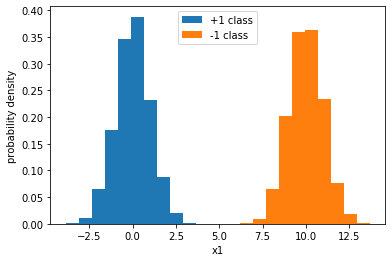

In [4]:
plt.hist(x[idx1,0],density=True,label = "+1 class")  #positive class histogram 

plt.hist(x[idx2,0],density = True, label = "-1 class")  #negative class histogram
plt.xlabel("x1")
plt.ylabel("probability density")
plt.legend()

In [5]:
class Synthetic_data(Dataset):
    def __init__(self,x,y):
        super(Synthetic_data,self).__init__()
        self.x = x
        self.y = y
    
    
    def __len__(self):
        return(len(self.y))
    
    
    def __getitem__(self,idx):
        return self.x[idx,:],self.y[idx]
    

In [6]:
dataset = Synthetic_data(x,y)
trainloader = DataLoader(dataset,batch_size=100,shuffle=True)

In [7]:
inp,targ = iter(trainloader).next()
print(inp.shape,targ.shape)

torch.Size([100, 50]) torch.Size([100])


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(50,128)
        self.linear2 = nn.Linear(128,128)
        self.linear3 = nn.Linear(128,64)
        self.linear4 = nn.Linear(64,2)
    def forward(self,x):
        x =  F.relu(self.linear1(x))
        x =  F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [9]:
net = Net().double()
net(inp)

tensor([[-0.0079,  0.1615],
        [ 0.0512,  0.2004],
        [-0.0076,  0.1433],
        [ 0.0818,  0.2063],
        [-0.0154,  0.1697],
        [ 0.0796,  0.2273],
        [ 0.0102,  0.1499],
        [ 0.0083,  0.1671],
        [-0.0274,  0.1470],
        [-0.0199,  0.1580],
        [ 0.0548,  0.1873],
        [-0.0408,  0.1555],
        [ 0.0790,  0.1997],
        [ 0.0557,  0.2099],
        [ 0.1098,  0.2270],
        [-0.0166,  0.1730],
        [ 0.0200,  0.1895],
        [ 0.0049,  0.1756],
        [-0.0058,  0.1769],
        [ 0.0602,  0.2003],
        [ 0.1187,  0.2245],
        [-0.0130,  0.1685],
        [-0.0284,  0.1535],
        [-0.0128,  0.1392],
        [ 0.0007,  0.1559],
        [ 0.0695,  0.1964],
        [ 0.1033,  0.2083],
        [ 0.0394,  0.1944],
        [-0.0167,  0.1469],
        [-0.0091,  0.1346],
        [-0.0167,  0.1511],
        [ 0.0643,  0.1853],
        [ 0.0187,  0.1685],
        [ 0.0727,  0.2187],
        [ 0.0974,  0.2296],
        [ 0.0368,  0

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr =0.01)

In [12]:
for epoch in range(100):
    running_loss = 0.0
    cnt = 0 
    for i,data in enumerate(trainloader):
        x_input ,targets = data
        
        optimizer.zero_grad()
        
        outputs = net(x_input)
        
        
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs,targets)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
        if cnt % 50 == 49:    # print every 6 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 50))
            running_loss = 0.0
        cnt=cnt+1
        
        

[1,    50] loss: 0.468
[1,   100] loss: 0.342
[2,    50] loss: 0.259
[2,   100] loss: 0.205
[3,    50] loss: 0.159
[3,   100] loss: 0.127
[4,    50] loss: 0.104
[4,   100] loss: 0.084
[5,    50] loss: 0.070
[5,   100] loss: 0.059
[6,    50] loss: 0.049
[6,   100] loss: 0.043
[7,    50] loss: 0.037
[7,   100] loss: 0.032
[8,    50] loss: 0.028
[8,   100] loss: 0.026
[9,    50] loss: 0.023
[9,   100] loss: 0.020
[10,    50] loss: 0.018
[10,   100] loss: 0.017
[11,    50] loss: 0.015
[11,   100] loss: 0.014
[12,    50] loss: 0.013
[12,   100] loss: 0.012
[13,    50] loss: 0.011
[13,   100] loss: 0.010
[14,    50] loss: 0.009
[14,   100] loss: 0.009
[15,    50] loss: 0.008
[15,   100] loss: 0.008
[16,    50] loss: 0.007
[16,   100] loss: 0.007
[17,    50] loss: 0.006
[17,   100] loss: 0.007
[18,    50] loss: 0.006
[18,   100] loss: 0.006
[19,    50] loss: 0.005
[19,   100] loss: 0.005
[20,    50] loss: 0.005
[20,   100] loss: 0.005
[21,    50] loss: 0.005
[21,   100] loss: 0.004
[22,    50